# Importing libraries

In [3]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Reading csv

In [5]:
data = pd.read_csv('salary.csv')



# Initial PreProcessing

In [7]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
y = data["class"]
X = data[["alpha","delta","u","g","r","i","z"]]
y.shape, X.shape

KeyError: 'class'

In [122]:
data.dtypes


obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [123]:
for column in data.columns:
    print(column, len(data[data[column].isna()]))
    

obj_ID 0
alpha 0
delta 0
u 0
g 0
r 0
i 0
z 0
run_ID 0
rerun_ID 0
cam_col 0
field_ID 0
spec_obj_ID 0
class 0
redshift 0
plate 0
MJD 0
fiber_ID 0


In [124]:
data = data.drop(
    columns=["obj_ID", "run_ID", "rerun_ID",
             "field_ID", "spec_obj_ID", "fiber_ID",
             "plate", "MJD", "cam_col"])

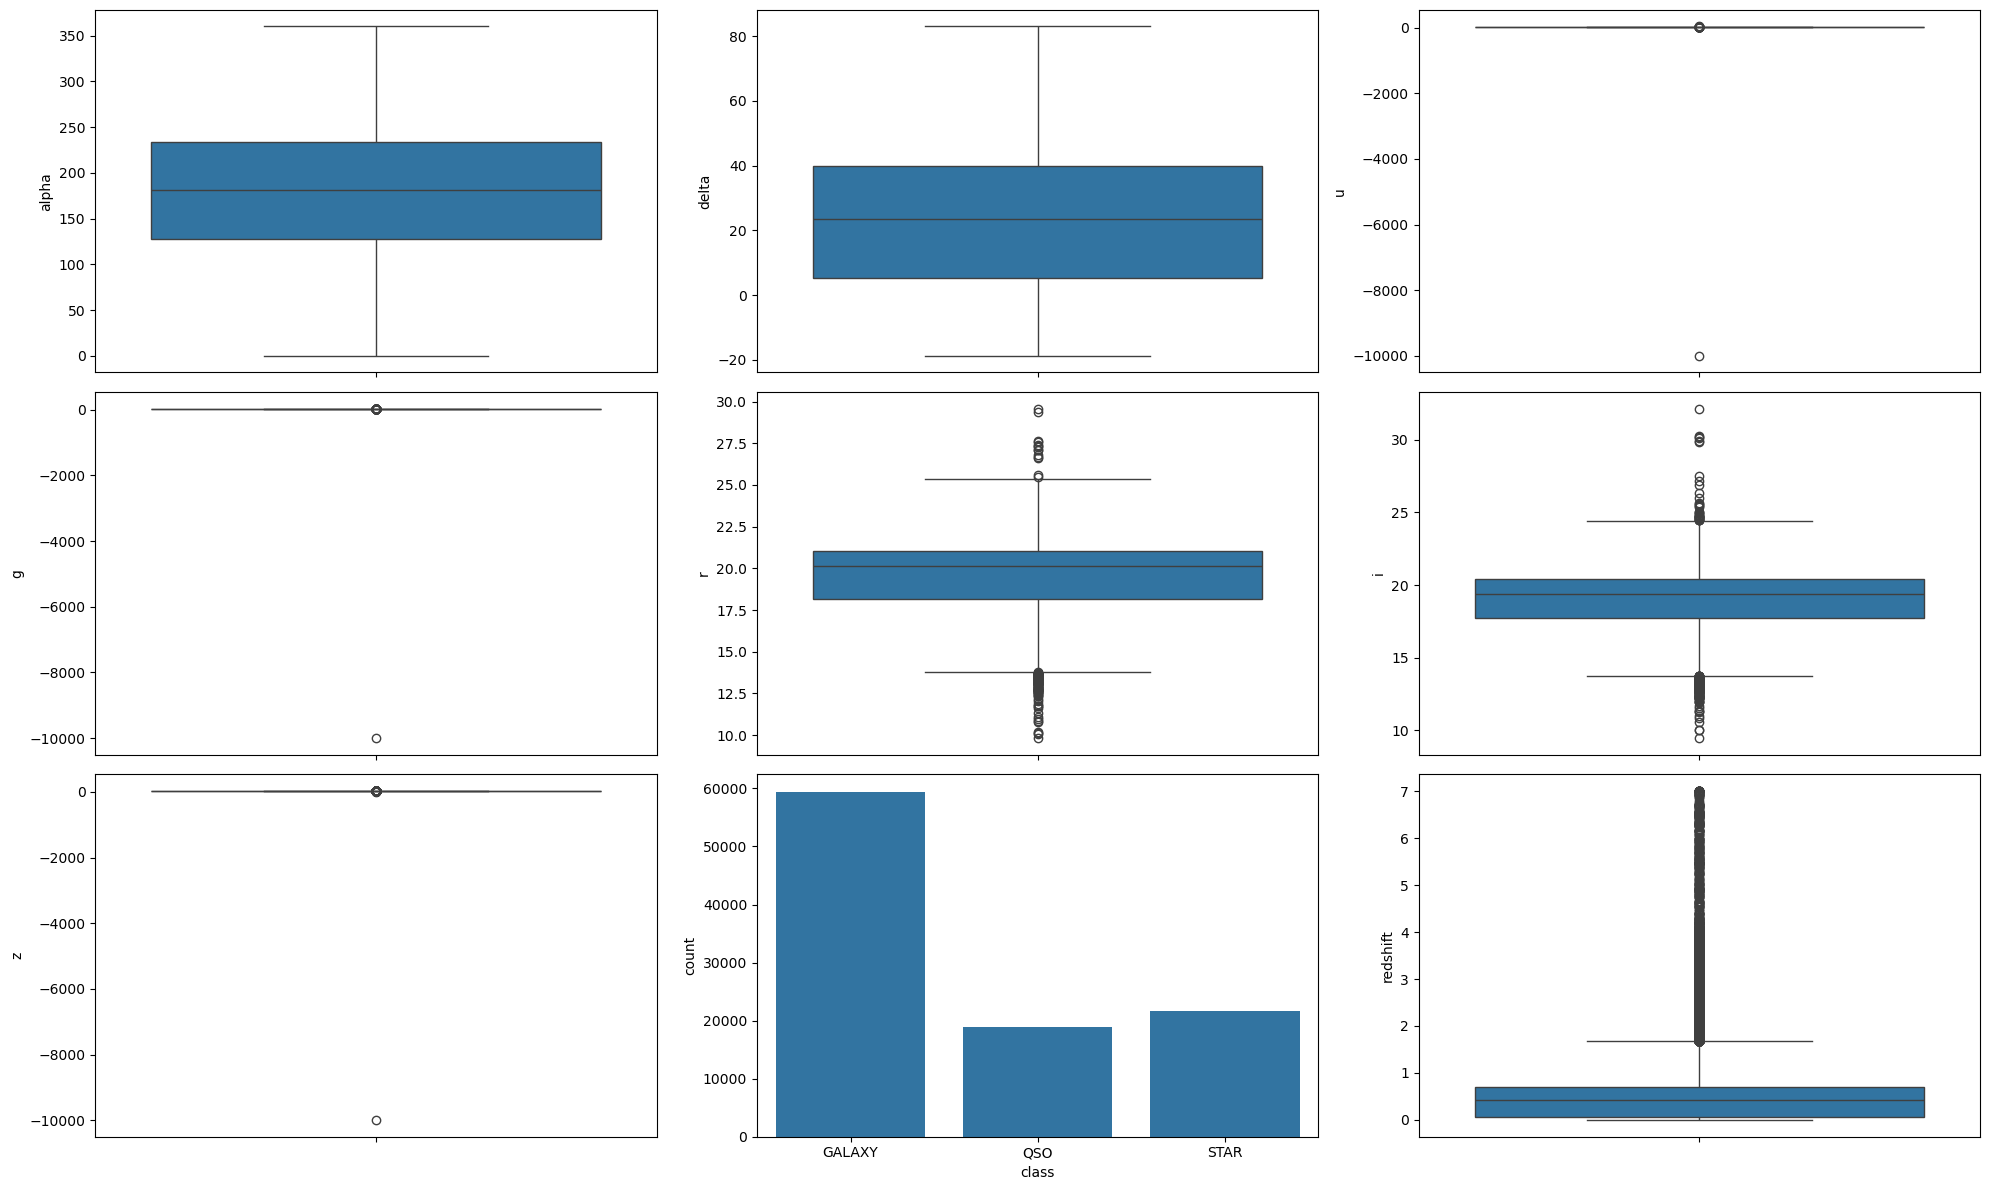

In [125]:
plt.figure(figsize=(20, 12))
for index, column in enumerate(data.columns):
    plt.subplot(3,3,index+1)
    if column != "class":
        sns.boxplot(data, y=column)
    else:
        sns.countplot(data, x=column)
plt.tight_layout()
plt.show()

In [126]:
#Filter data using Inter quantile range
def iqr(data, column): #Inter quantile range
    q3 = data[column].quantile(0.75) #3er cuartil
    q1 = data[column].quantile(0.25) #1er cuartil
    superior_limit = q3 + 1.5*(q3 - q1)
    inferior_limit = q1 - 1.5*(q3 - q1)
    return data[(data[column] < superior_limit) & (data[column] > inferior_limit)] #Selects data

In [127]:
for col in data.columns: 
    if col != "class":
        data = iqr(data, col) 
data

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


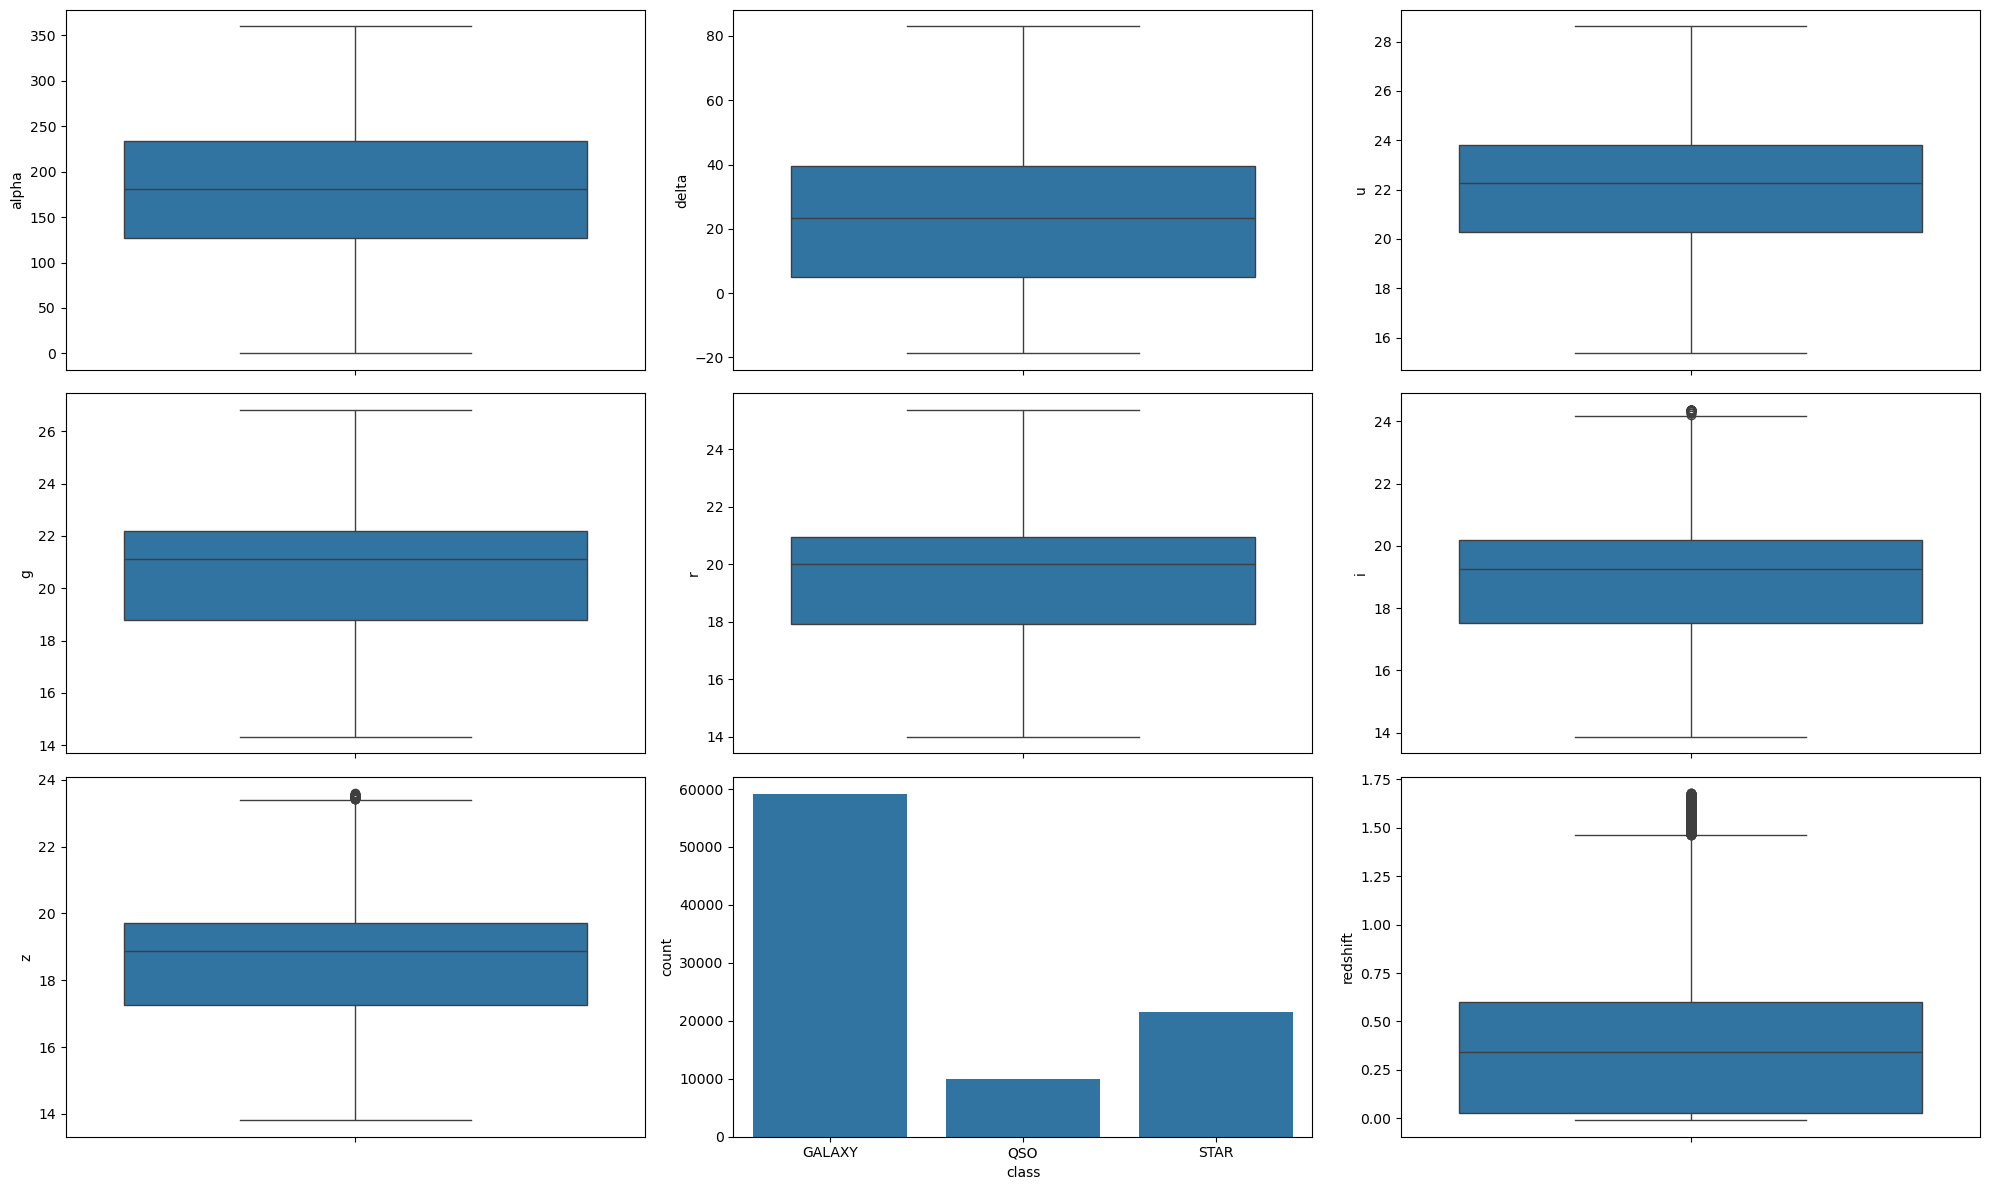

In [128]:
plt.figure(figsize=(20, 12))
for index, column in enumerate(data.columns):
    plt.subplot(3,3,index+1)
    if column != "class":
        sns.boxplot(data, y=column)
    else:
        sns.countplot(data, x=column)
plt.tight_layout()
plt.show()

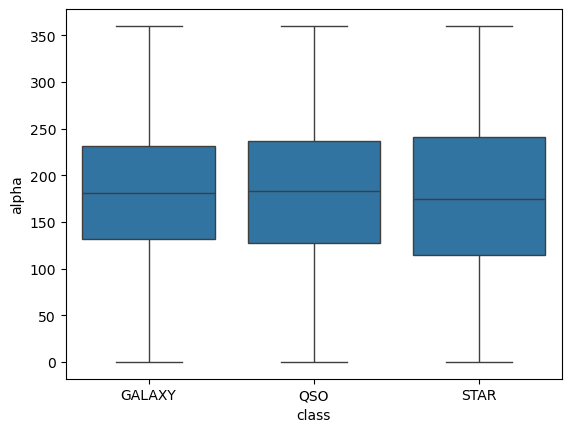

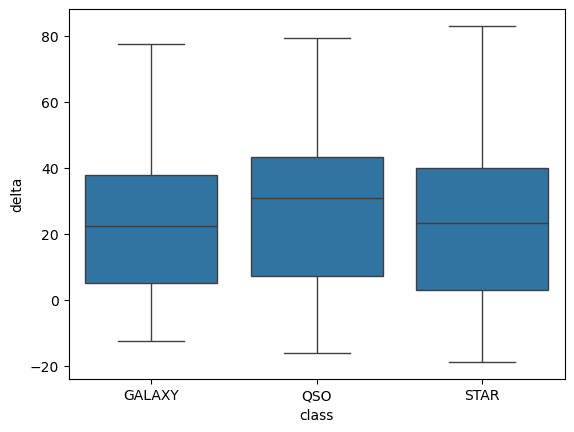

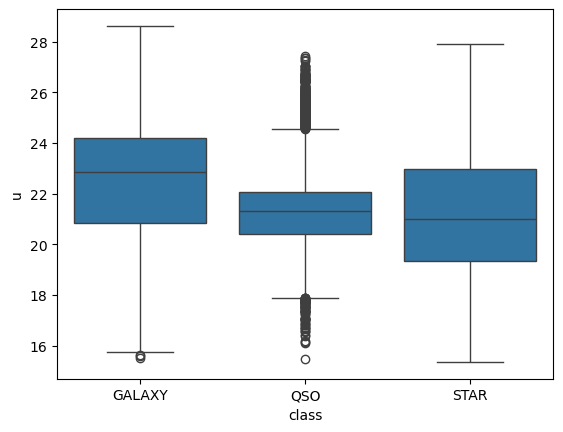

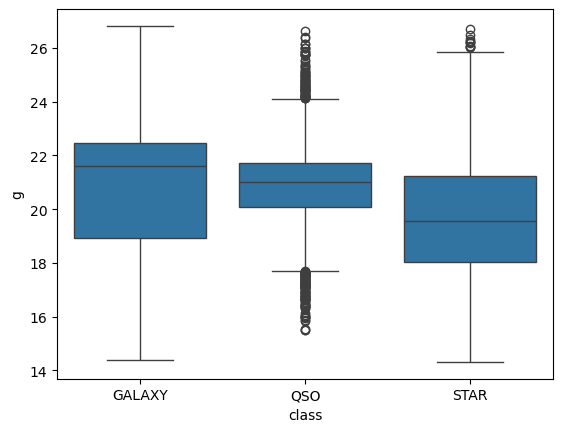

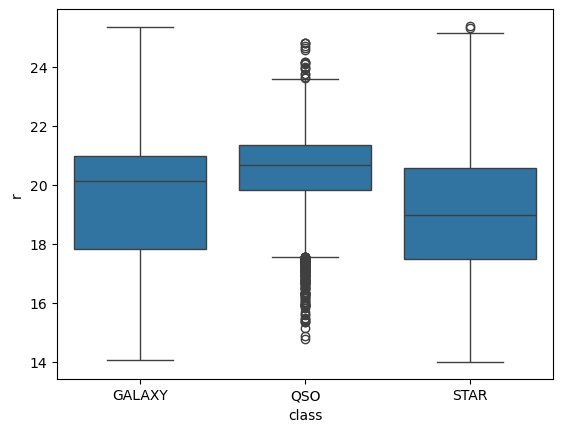

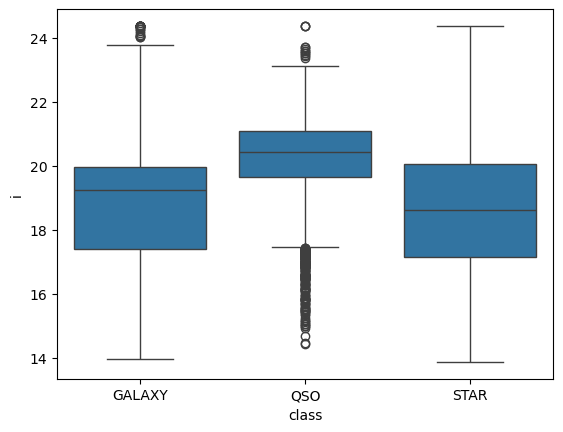

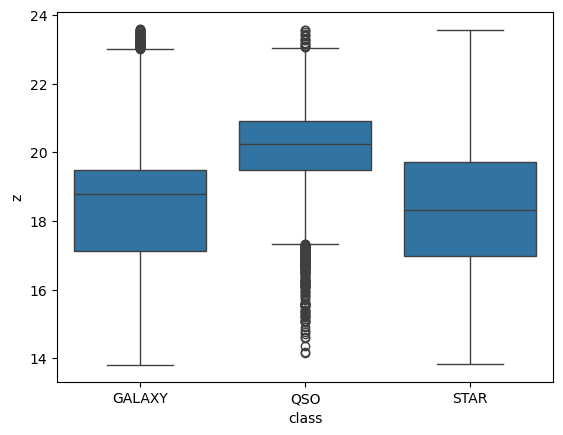

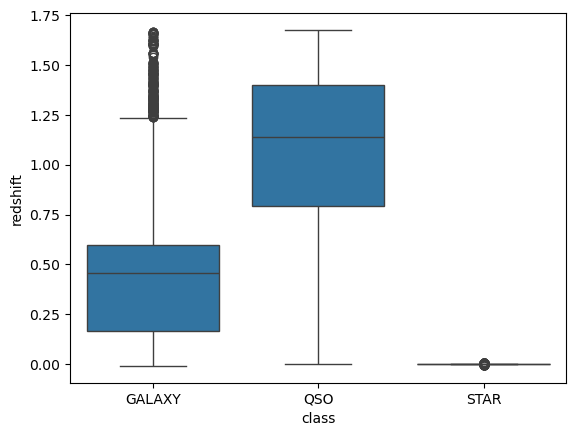

In [129]:
for column in data.columns:
    if column != "class":
        sns.boxplot(data, y=column, x="class")
        plt.show()

In [130]:
data.columns


Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')

In [131]:
X = data.drop(columns=["alpha", "delta", "class"])
y = data["class"]

<Axes: >

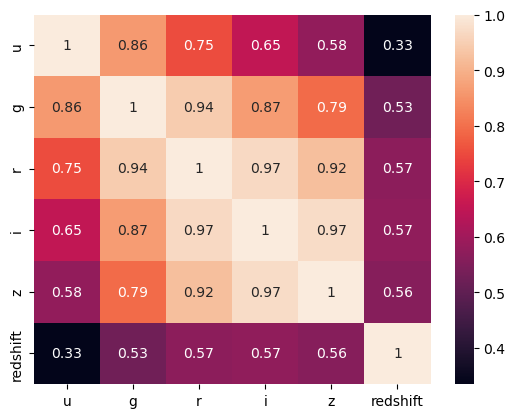

In [132]:
sns.heatmap(X.corr(), annot=True)


In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67950, 6), (22650, 6), (67950,), (22650,))

In [135]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [136]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([0.78339228, 0.12085502, 0.0761156 , 0.01434975, 0.00339801,
       0.00188934])

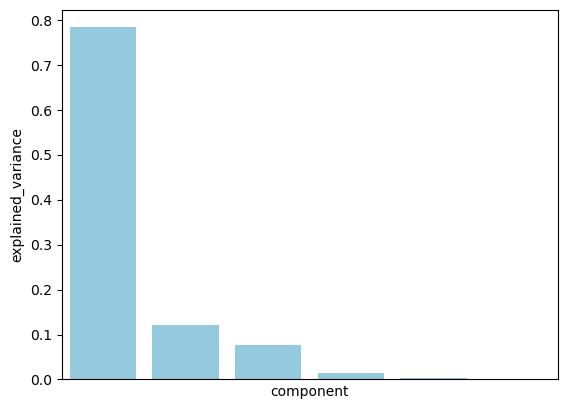

In [137]:
exp_variance = pd.DataFrame(pca.explained_variance_ratio_) #Gets explained variance
exp_variance["component"] = exp_variance.index + 1 #Assign a PC number
exp_variance = exp_variance.rename(columns={0: "explained_variance"}) #Rename 0 column to explained_variance
sns.barplot(exp_variance, x="component", y = "explained_variance", color="skyblue") #Plot explained variance
plt.xticks([]) #Drops xticks
plt.show() #Display

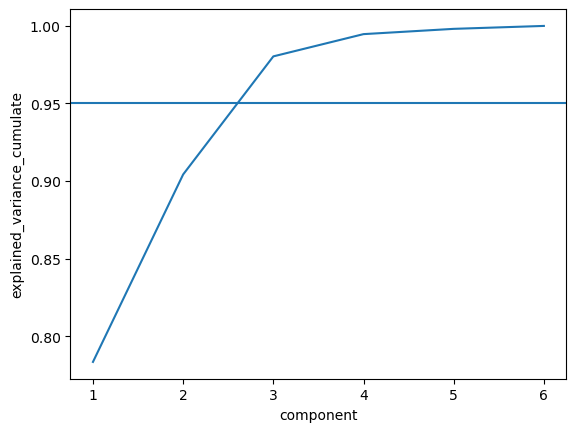

In [138]:
exp_variance["explained_variance_cumulate"] = exp_variance["explained_variance"].cumsum() #Cummulative sum
sns.lineplot(exp_variance, x = "component", y="explained_variance_cumulate") #Plots
plt.axhline(0.95)  #Plots line at 95% of variance
plt.show() #Display

In [139]:
pca = PCA(4)
X_train_trans = pca.fit_transform(X_train)
X_test_trans = pca.transform(X_test)

In [140]:
X_train


array([[ 5.53551028e-01,  4.27959624e-01,  1.38516426e-01,
        -1.19395452e-05, -4.26774730e-02,  1.90977694e-01],
       [-5.73041760e-01, -9.89366677e-01, -1.17565651e+00,
        -1.23581396e+00, -1.26607379e+00, -6.35975292e-01],
       [ 2.47553899e-03,  5.19309382e-01,  1.00001162e+00,
         1.30722285e+00,  1.15538647e+00,  1.13123060e+00],
       ...,
       [-1.25418026e+00, -1.30184943e+00, -1.16536936e+00,
        -1.10796977e+00, -1.02434803e+00, -7.65498989e-01],
       [-1.12632577e+00, -1.20671445e+00, -1.08218977e+00,
        -9.20766850e-01, -7.75080919e-01, -1.01262263e+00],
       [ 8.14639746e-01,  1.18913556e+00,  8.50180755e-01,
         4.51982862e-01,  3.29469187e-01,  6.53324982e-01]])

<Axes: xlabel='0', ylabel='1'>

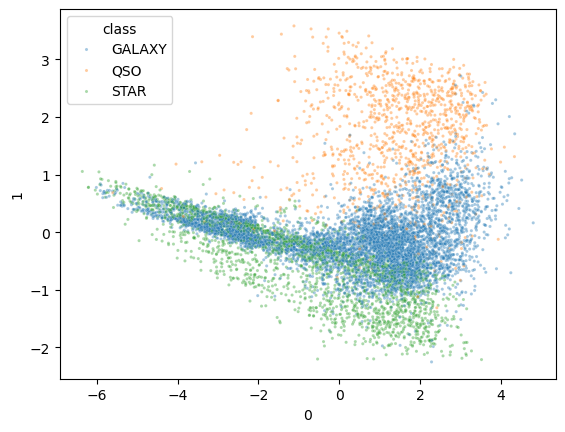

In [141]:
sns.scatterplot(pd.DataFrame(X_train_trans, index=y_train.index).sample(10000), x=0, y=1, hue=y_train , alpha=0.4, s = 5)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

In [143]:
lr = LogisticRegression(class_weight="balanced", max_iter=1000)
cv_score = cross_validate(lr, X_train, y_train, scoring="roc_auc_ovr")["test_score"]
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)
cv_score.mean(), cv_score.std(), roc_auc_score(y_test, y_prob, multi_class="ovr")

(0.98278419332674, 0.0016800674011548584, 0.9829068010197477)

In [144]:
lr = LogisticRegression(class_weight="balanced")
cv_score = cross_validate(lr, X_train_trans, y_train, scoring="roc_auc_ovr")["test_score"]
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)
y_prob = lr.predict_proba(X_test_trans)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.91      0.94     14839
         QSO       0.67      0.89      0.77      2488
        STAR       0.94      1.00      0.97      5323

    accuracy                           0.93     22650
   macro avg       0.86      0.93      0.89     22650
weighted avg       0.94      0.93      0.93     22650



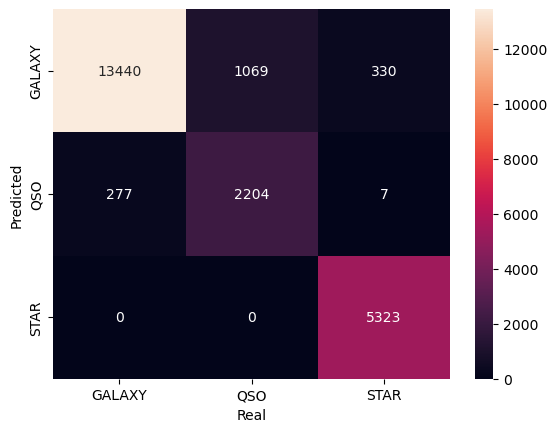

In [145]:
y_pred = lr.predict(X_test_trans)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=lr.classes_, index=lr.classes_)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.show()

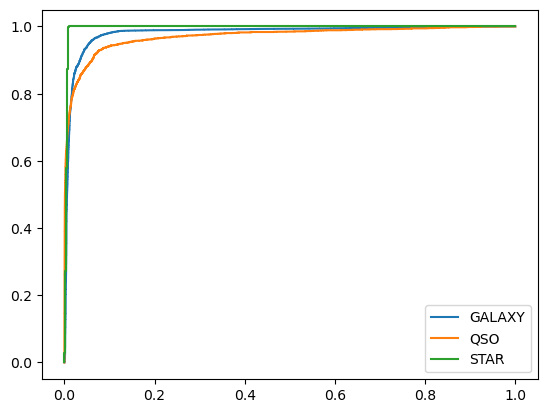

In [146]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test == "GALAXY", y_prob[:,0])
plt.plot(fpr, tpr, label="GALAXY")

fpr, tpr, threshold = roc_curve(y_test == "QSO", y_prob[:,1])
plt.plot(fpr, tpr, label="QSO")

fpr, tpr, threshold = roc_curve(y_test == "STAR", y_prob[:,2])
plt.plot(fpr, tpr, label="STAR")
plt.legend()
plt.show()

In [147]:
coefs = pd.DataFrame(lr.coef_)
coefs

,0,1,2,3
0,4.302091,10.698016,8.069338,-0.209074
1,4.454441,13.593034,7.246449,-1.676911
2,-8.756532,-24.291050,-15.315786,1.885984


In [148]:
coefs = coefs.T.rename(columns={0: "Galaxy", 1: "Star", 2: "QSR"}).reset_index()
coefs

,index,Galaxy,Star,QSR
0,0,4.302091,4.454441,-8.756532
1,1,10.698016,13.593034,-24.291050
2,2,8.069338,7.246449,-15.315786
3,3,-0.209074,-1.676911,1.885984


In [149]:
melted = coefs.melt(id_vars="index")
melted

,index,variable,value
0,0,Galaxy,4.302091
1,1,Galaxy,10.698016
2,2,Galaxy,8.069338
3,3,Galaxy,-0.209074
4,0,Star,4.454441
5,1,Star,13.593034
6,2,Star,7.246449
7,3,Star,-1.676911
8,0,QSR,-8.756532
9,1,QSR,-24.291050


<Axes: xlabel='index', ylabel='value'>

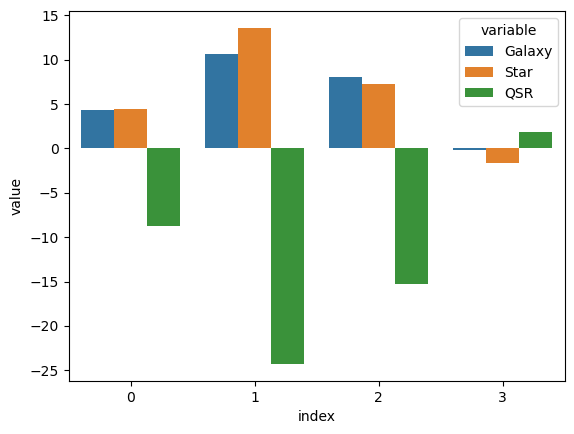

In [150]:
sns.barplot(melted, y="value",x="index", hue="variable")


In [151]:
sub_data = pd.DataFrame(X_test_trans)
sub_data["y_pred"] = y_pred
sub_data["y_true"] = y_test.reset_index(drop=True)
sub_data

,0,1,2,3,y_pred,y_true
0,-1.371182,-0.911464,1.428227,-0.761047,GALAXY,GALAXY
1,-2.600309,-0.072001,0.433068,-0.010045,GALAXY,GALAXY
2,0.833633,-0.078483,0.053476,0.269294,GALAXY,GALAXY
3,0.963173,-0.442300,0.311386,0.025278,GALAXY,GALAXY
4,2.644310,-0.650337,0.780725,0.151633,GALAXY,GALAXY
...,...,...,...,...,...,...
22645,-2.648118,0.217672,-0.743023,0.010223,STAR,STAR
22646,1.637179,-0.406209,0.654527,0.065357,GALAXY,GALAXY
22647,1.559100,0.733404,-0.000795,0.185204,QSO,GALAXY
22648,2.521284,-0.293791,0.402516,0.716717,GALAXY,GALAXY


<Axes: xlabel='0', ylabel='1'>

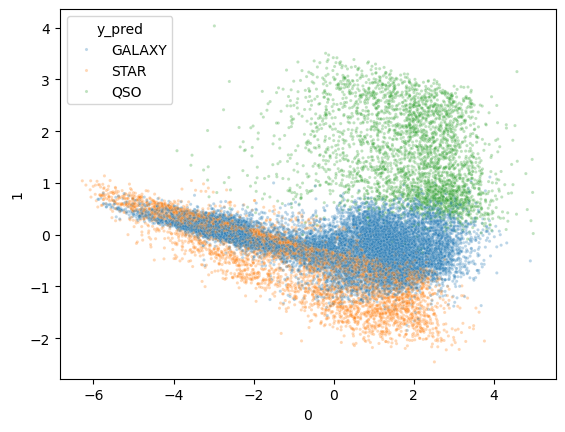

In [152]:
sns.scatterplot(sub_data, x=0, y=1, hue="y_pred", alpha=0.3, s=5)


<Axes: xlabel='0', ylabel='1'>

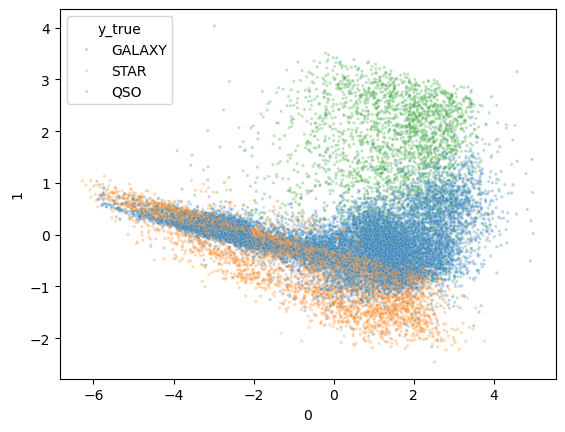

In [153]:
sns.scatterplot(sub_data, x=0, y=1, hue="y_true", alpha=0.3, s=5)

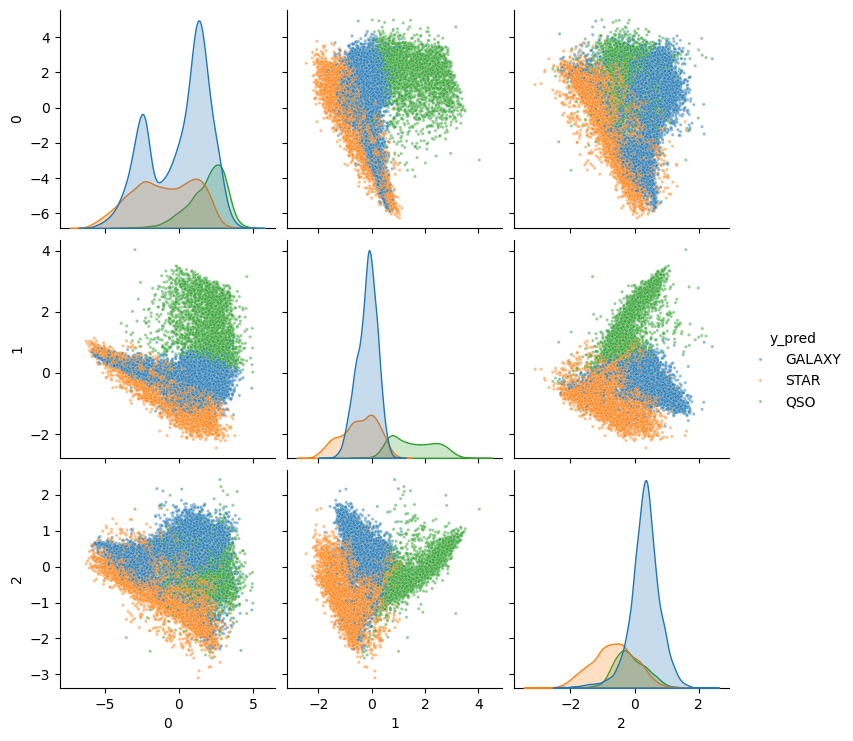

In [154]:
sns.pairplot(sub_data[[0,1,2,"y_pred"]], hue="y_pred", plot_kws={"alpha":0.5, "s": 5, "hue_order": ["QSO", "GALAXY", "STAR"]})


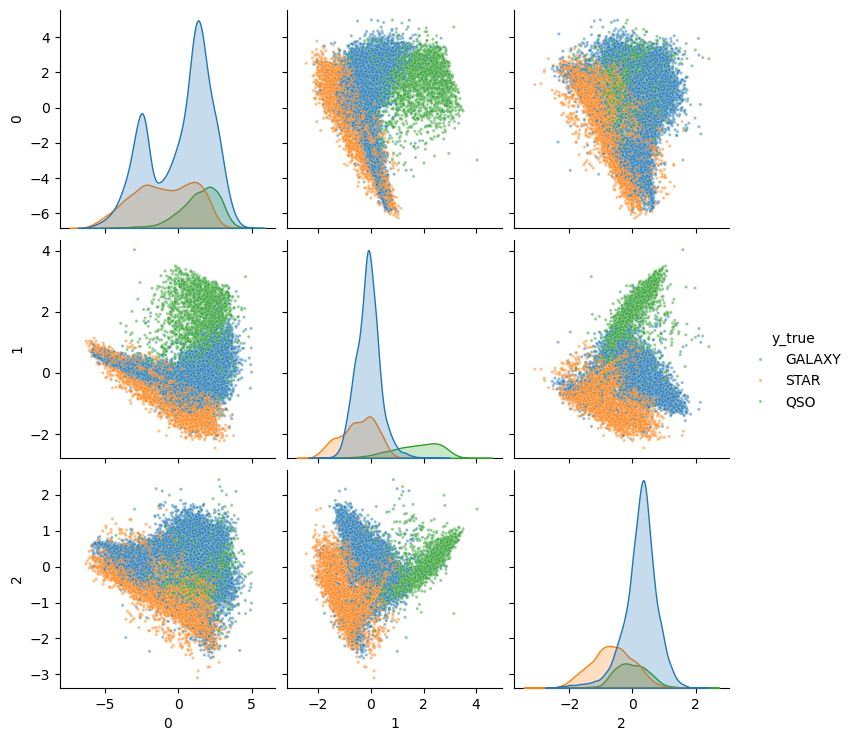

In [155]:

sns.pairplot(sub_data[[0,1,2,"y_true"]], hue="y_true", plot_kws={"alpha":0.5, "s": 5, "hue_order": ["QSO", "GALAXY", "STAR"]})


In [156]:
print(data.columns.tolist())


['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift']


In [157]:


# Load data
df = pd.read_csv('salary.csv')
df.columns = df.columns.str.strip()

# Encode target
class_encoder = LabelEncoder()
df['class'] = class_encoder.fit_transform(df['class'])

# Features and target
X = df[['u', 'g', 'r', 'i', 'z', 'redshift']]
y = df['class']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [158]:
# Define a new, unseen data sample
custom_input = pd.DataFrame([{
    'u': 18.5,
    'g': 17.8,
    'r': 17.2,
    'i': 16.9,
    'z': 16.7,
    'redshift': 0.01
}])

# Preprocess
custom_input_scaled = scaler.transform(custom_input)

# Predict
prediction = model.predict(custom_input_scaled)
predicted_class = class_encoder.inverse_transform(prediction)[0]

print("Predicted Class:", predicted_class)


Predicted Class: GALAXY
